In [1]:
import numpy as np

from matchings import cross_bin_matching, max_weight_matching

import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.rcParams.update({
    'axes.linewidth' : 2,
    'font.size': 22,
    "text.usetex": True,
    'font.family': 'serif', 
    'font.serif': ['Computer Modern'],
    'text.latex.preamble' : r'\usepackage{amsmath,amsfonts}'})

lblue = (40/255,103/255,178/255)
cred = (0.69411765, 0.01568627, 0.05490196)


# Demo cross-bin matching

In [2]:
np.random.seed(1234567891)
n = 100
Z = 2*np.random.rand(n)-1
err = np.random.randn(n)
x = .25
Y = (((1+x)*Z**2-x + .5*err))
Z = Z[np.abs(Y) < 1]
Y = Y[np.abs(Y) < 1]

eta = .2
K = 4

W = eta*K
for i in range(len(Z)):
    if np.min(np.abs(-W+eta*np.arange(2*K+1)-Z[i])) < .01: 
        Z[i]+=.02
        
M = cross_bin_matching(Y, Z, K, eta)

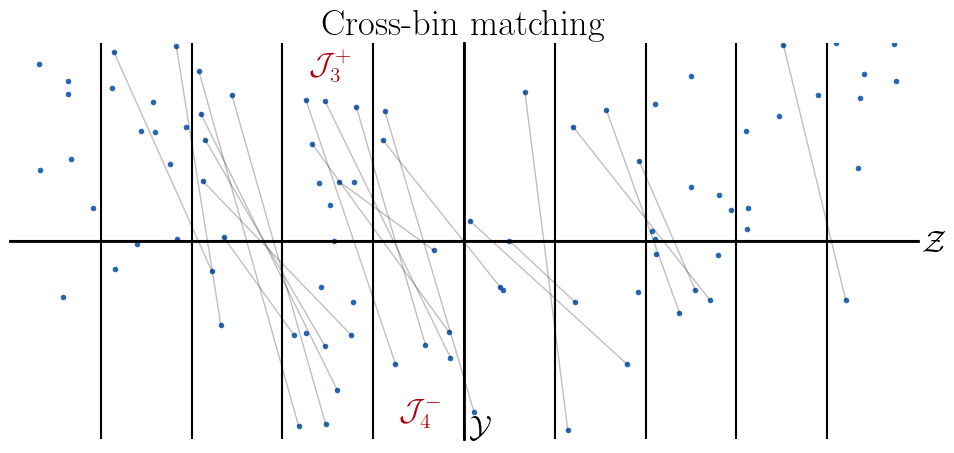

In [3]:
plt.figure(figsize=(10,5))
plt.plot(Z, Y, '.', c=lblue)


W = eta*K
for k in range(2*K+1):
    plt.axvline(-W+k*eta, color='k')

plt.axhline(0, color='k')

for (i, j) in M:
    plt.plot([Z[i], Z[j]], [Y[i], Y[j]], alpha=.25, c='k', lw=1)

plt.xlim([-1,1])
plt.ylim([-1,1])

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_position('zero')
plt.gca().spines['left'].set_position('zero')

plt.xticks([])
plt.yticks([])
plt.title('Cross-bin matching')
plt.text(1.01, -.05, '$\\mathcal{Z}$')
plt.text(.01, -.99, '$\\mathcal{Y}$')

plt.text(-.4+.06, .85, '$\\mathcal{J}_3^+$', color=cred)
plt.text(-.2+.06, -.9, '$\\mathcal{J}_4^-$', color=cred)


plt.tight_layout()

plt.show()

In [8]:
n = 50
E = np.random.rand(n, n)
E = (E-E.T)/2
V = np.random.rand(n, n)
V = (V+V.T)/2
M = max_weight_matching(E, V)